# Exploratory Data analysis
<p>In this we attempt to explore data and will perform some statistical analysis. Figure out some important insights and realations among the attributes present to build our Machine Learning Model</p>

In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #for running in jupyter notebook
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
data = pd.read_csv("../Dataset/movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Data attributes present in the dataset

In [3]:
for ind, val in enumerate(data.columns):
    print(f"{ind+1}) {val}")

1) color
2) director_name
3) num_critic_for_reviews
4) duration
5) director_facebook_likes
6) actor_3_facebook_likes
7) actor_2_name
8) actor_1_facebook_likes
9) gross
10) genres
11) actor_1_name
12) movie_title
13) num_voted_users
14) cast_total_facebook_likes
15) actor_3_name
16) facenumber_in_poster
17) plot_keywords
18) movie_imdb_link
19) num_user_for_reviews
20) language
21) country
22) content_rating
23) budget
24) title_year
25) actor_2_facebook_likes
26) imdb_score
27) aspect_ratio
28) movie_facebook_likes


In [4]:
categoricalCol = ["color", "country","language","plot_keywords","actor_3_name",
                  "movie_title","actor_1_name","genres","actor_2_name","director_name","content_rating","movie_imdb_link"]

In [5]:
numericalCol = []
for i in data.columns:
    if i not in categoricalCol:
        numericalCol.append(i)

In [6]:
numericalCol

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

# EDA for numerical data

In [7]:
NumDf = pd.read_csv("../Dataset/movie_metadata.csv")

In [8]:
for i in categoricalCol:
    NumDf.drop(i, axis=1, inplace=True)

In [9]:
NumDf

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,NaN,629,2283,2.0,6.0,NaN,2013.0,470.0,7.7,NaN,84
5039,43.0,43.0,NaN,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,32000
5040,13.0,76.0,0.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,16
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,660


In [10]:
l = 0
m = 0
g = 0
for i in data["imdb_score"]:
    if i > 7:
        g+=1
    elif i>4:
        m+=1
    else:
        l+=1
print(f"{l}, {m}, {g}")

174, 3275, 1594


In [11]:
colors = ['blue', 'green', 'black', 'brown', 'purple', 'red']
fig = go.Figure(data=[go.Pie(labels=["<5*", ">4* && <8*", ">7*"],
values= [l,m,g],
title="Distribution of movies absed on IMdB rating"
)])
fig

In [12]:
set(data["color"])

{' Black and White', 'Color', nan}

#### Attributes those were not relevant to model building based on domain knowledge

In [13]:
NumDf.drop(["num_critic_for_reviews","director_facebook_likes","actor_3_facebook_likes",
            "actor_1_facebook_likes","num_voted_users","cast_total_facebook_likes",
            "facenumber_in_poster","num_user_for_reviews","actor_2_facebook_likes","aspect_ratio","movie_facebook_likes"],
           axis=1, inplace=True)

## Correlation among numerical attributes

<p><b>.corr()</b> function of pandas let us find person correlation value of every numerical attribute with other </p>

In [14]:
NumDf.corr()

,duration,gross,budget,title_year,imdb_score
duration,1.000000,0.250298,0.074276,-0.135038,0.261662
gross,0.250298,1.000000,0.102179,0.030886,0.198021
budget,0.074276,0.102179,1.000000,0.045726,0.030688
title_year,-0.135038,0.030886,0.045726,1.000000,-0.209167
imdb_score,0.261662,0.198021,0.030688,-0.209167,1.000000


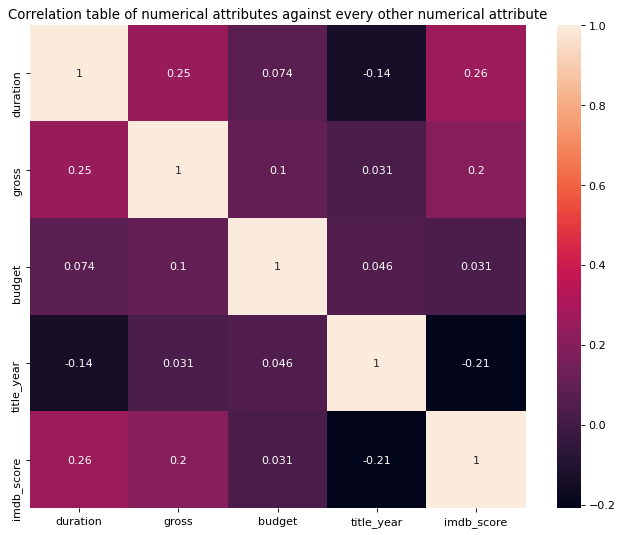

In [15]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plt.title("Correlation table of numerical attributes against every other numerical attribute")
sns.heatmap(NumDf.corr(),annot=True)
plt.show()


In [16]:
corTab = NumDf.corr()

In [17]:
corGross = abs(corTab["gross"])
corBudget = abs(corTab["budget"])
corImdbscore = abs(corTab["imdb_score"])

In [18]:
corGross

duration      0.250298
gross         1.000000
budget        0.102179
title_year    0.030886
imdb_score    0.198021
Name: gross, dtype: float64

In [19]:
fig = px.scatter_3d(NumDf, x='gross', y='budget', z='imdb_score',
                   color='title_year', opacity=0.7,template='plotly_dark')
fig.show()

In [20]:
data["budget"].describe()

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [21]:
fig = px.histogram(data["imdb_score"], nbins=10,
                  title='Histogram showing range of IMdB score movies have',
                  marginal = 'box',
                  color_discrete_sequence=['goldenrod'],template='plotly_dark')
fig.update_layout(
bargap=0.2, showlegend=False)
fig.show()

In [22]:
NumDf["duration"]

0       178.0
1       169.0
2       148.0
3       164.0
4         NaN
        ...  
5038     87.0
5039     43.0
5040     76.0
5041    100.0
5042     90.0
Name: duration, Length: 5043, dtype: float64

In [23]:
px.scatter(NumDf, x="duration", y="gross", color="imdb_score", 
           title="Scatter plot for Duration VS Gross",
          labels={
              "duration":"Duration of each movie",
              "gross":"Gross earning of each movie",
              "imdb_score":"Rating on IMdb"
          },template='plotly_dark')

In [24]:

px.scatter(NumDf,x="gross", y="imdb_score", color="title_year", 
           title="Scatter plot for Gross VS IMdB Score",  
           labels = {'gross': 'Gross Earning of each movies', 
                     'imdb_score':'Rating of each movie on IMdB',
                    "title_year":"Year of Release"},template='plotly_dark')